In [143]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [144]:
path = r'D:\TS\Gia SMP va SMPcap 2021(Giá thị trường SMP) (1).csv'
df = pd.read_csv(path, sep=';', encoding = 'ISO-8859-1')
df


,Date,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [145]:
feats= ['3','4']

In [146]:
data = df[feats]
data['3']

0       964.4
1      1019.7
2       988.4
3      1002.0
4      1061.5
        ...  
360    1002.0
361    1002.0
362    1061.5
363    1022.6
364    1022.6
Name: 3, Length: 365, dtype: float64

In [148]:
from sklearn.model_selection import train_test_split
X_train,y_train, X_test,y_test = train_test_split(data['3'].values,data['4'].values, test_size=0.2, shuffle=False)


In [150]:
transformer = PowerTransformer()
X_train=transformer.fit_transform(X_train.reshape(1, -1))
X_test=transformer.fit_transform(X_test.reshape(1, -1))

In [153]:
import tensorflow as tf
import numpy as np
class GaussianModel(tf.Module):
    def __init__(self):
        super(GaussianModel, self).__init__()
        self.mu = tf.Variable(0.0, name='mu')
        self.sigma = tf.Variable(1.0, name='sigma')

    def __call__(self, x):
        dist = tf.distributions.Normal(loc=self.mu, scale=self.sigma)
        return dist.prob(x)

# Huấn luyện mô hình
model = GaussianModel()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

def loss(target, predicted):
    return -tf.reduce_mean(predicted)

epochs = 10
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        current_loss = loss(y_train, predictions)
    gradients = tape.gradient(current_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 1 == 0:
        print(f'Epoch {epoch}, Loss: {current_loss.numpy()}')

# Dự đoán
predictions_test = model(X_test)

# Hiển thị kết quả dự đoán
print("Predictions:", predictions_test.numpy())

AttributeError: module 'tensorflow' has no attribute 'distributions'

Elbow Method to determine the number of clusters to be formed:


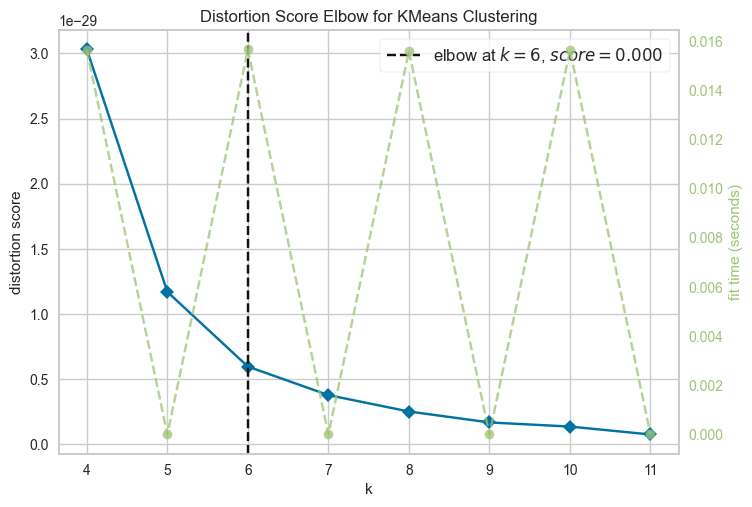

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

In [ ]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
PCA_ds["Clusters"] = preds
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [ ]:
# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.scatter(X, df[feats], c=labels, cmap='viridis', s=10)
plt.xlabel('Time')
plt.ylabel('Data 1')
plt.title('Clustering of Time Series Data 1')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, Y2, c=labels, cmap='viridis', s=10)
plt.xlabel('Time')
plt.ylabel('Data 2')
plt.title('Clustering of Time Series Data 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters in the original feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(X='feature1', Y1='feature2', hue='Clusters', data=PCA_ds, palette='Set1', legend='full')
plt.title('Clusters in Original Feature Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize the distribution of predict probabilities
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df_new, x='predict_proba', hue='preds', bins=30, kde=True, palette='Set1', multiple='stack')
# plt.title('Distribution of Predict Probabilities')
# plt.xlabel('Predict Probability')
# plt.ylabel('Frequency')
# plt.show()


ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1000x600 with 0 Axes>

In [ ]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [ ]:
labels=np.argmax(lgb_preds,axis=1)

Text(0.5, 1.0, 'Before clustering')

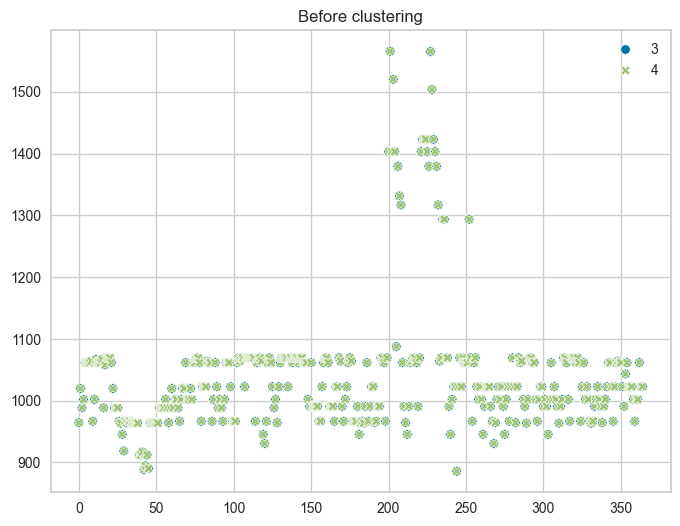

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(label="bla")
sns.scatterplot(df[feats], marker='o')
ax.set_title("Before clustering")

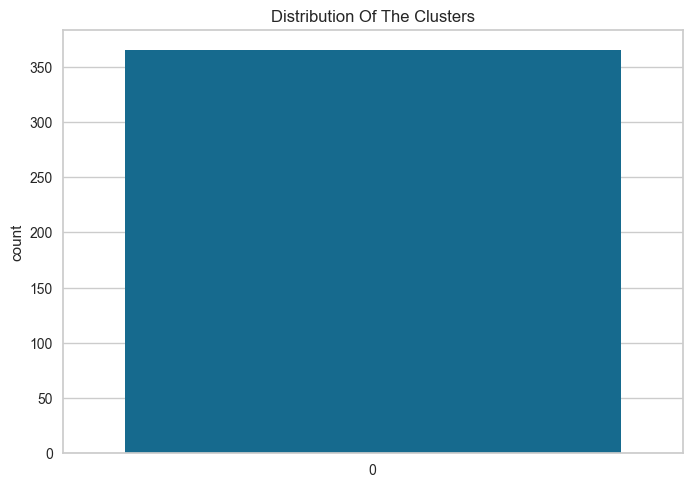

In [ ]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
test_size = df[df['Date'].dt.month==12].shape[0]
test_size

31

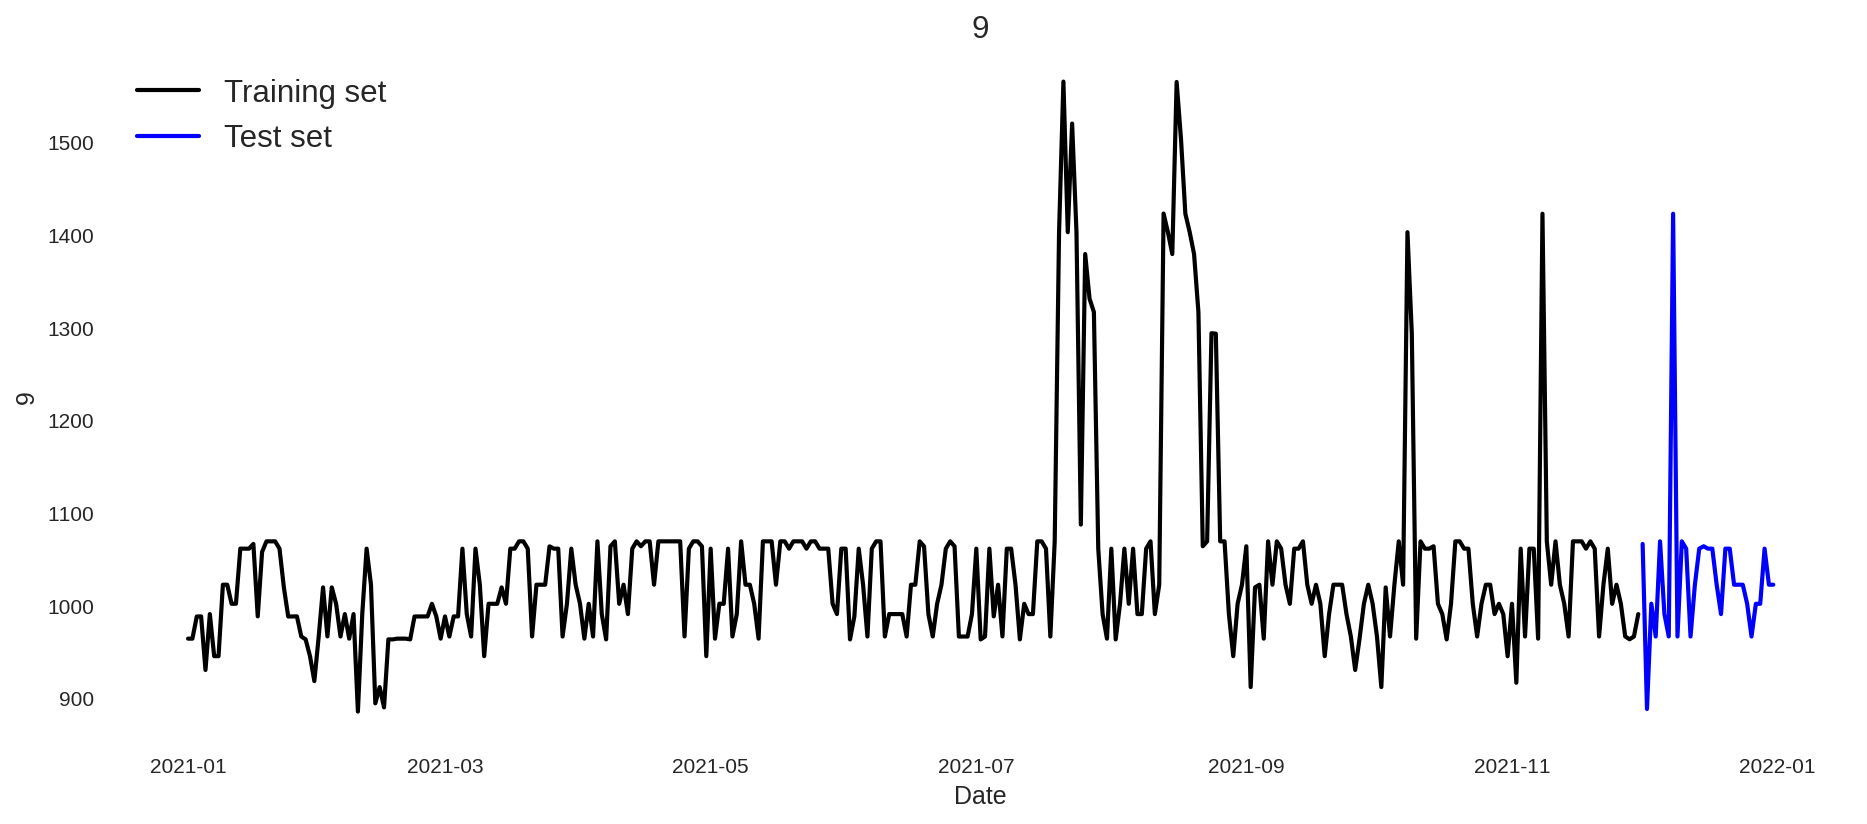

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'][:-test_size], df['9'][:-test_size], color='black', lw=2)
plt.plot(df['Date'][-test_size:], df['9'][-test_size:], color='blue', lw=2)
plt.title('9', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('9', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
import plotly.express as px
fig = px.line(y=df['9'], x=df['Date'])
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="4",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df['9'].values.reshape(-1,1))

MinMaxScaler()

In [ ]:
window_size = 15

In [ ]:
train_data = df['9'][:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df['9'][-test_size-window_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64)(input1)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

In [ ]:
model = define_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 3s 39ms/step - loss: 0.0669 - val_loss: 0.0326
Epoch 2/100
18/18 [==============================] - 0s

In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 425ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,accuracy_score,r2_score
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1-MAPE

In [ ]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.020769929513335228
Test MAPE: 2.1012975732987704
Test Accuracy: -1.1012975732987704


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

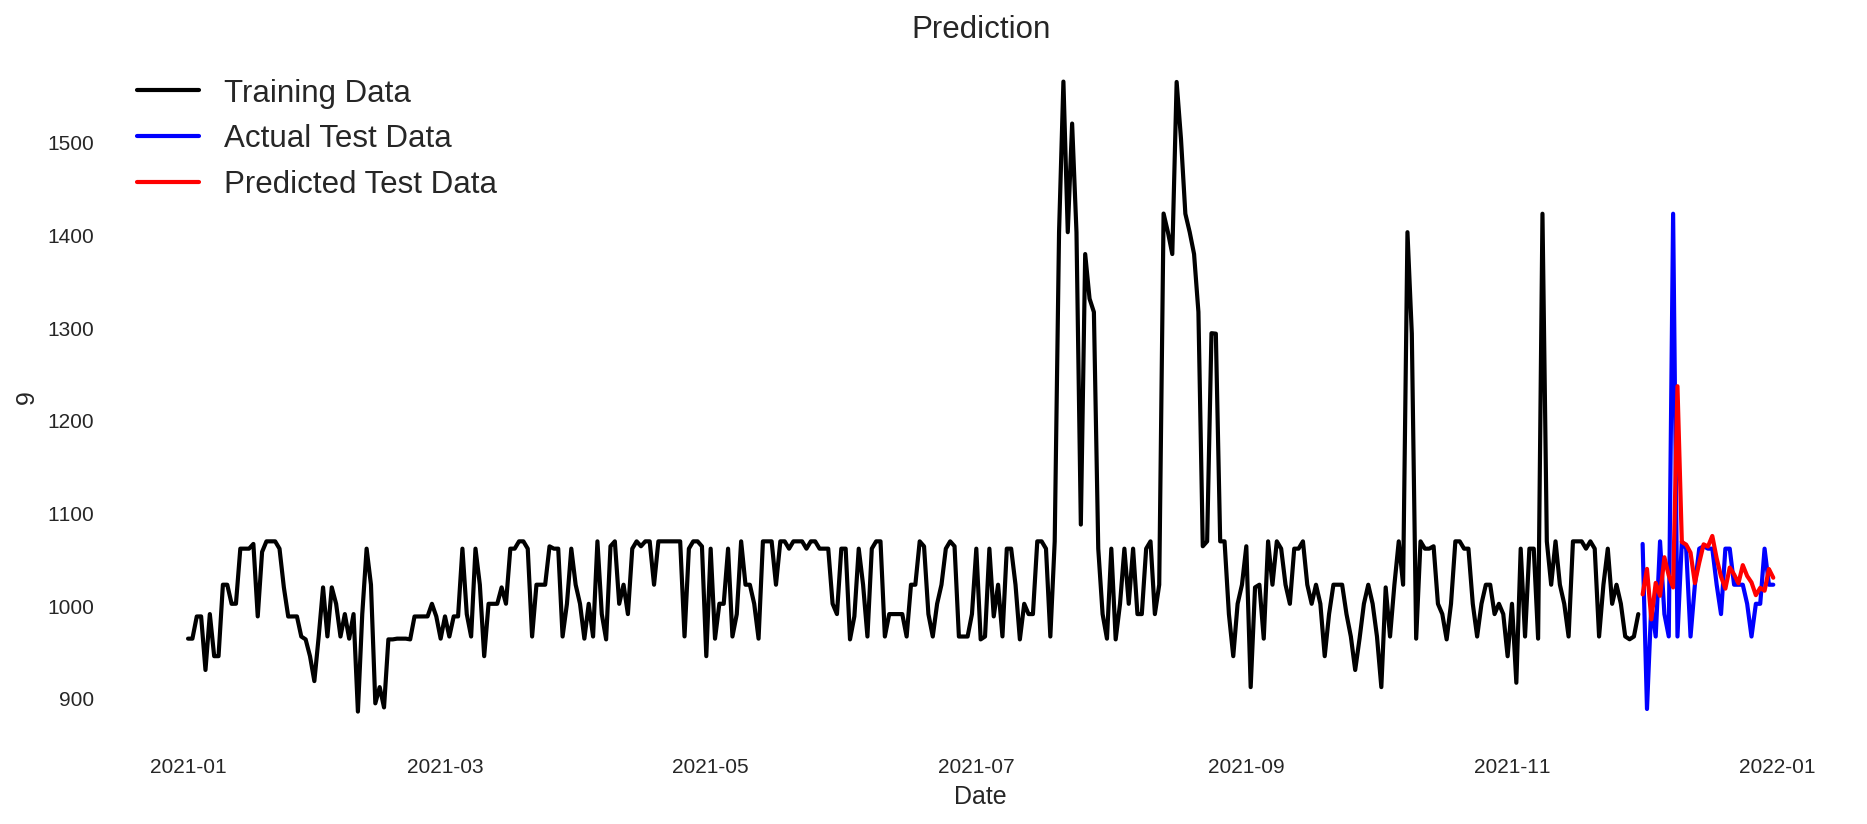

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('9', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()